In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [165]:
!pip install statsmodels
!pip install mxnet-mkl==1.6.0 numpy==1.23.1



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


**Q1 A - Import ‘signal-data.csv’ as DataFrame.**

In [166]:
data = pd.read_csv("/workspaces/GreatLearning/Featurization, Model Selection & Tuning/Project/signal-data.csv")

In [167]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


**Q1 B - Print 5 point summary and share at least 2 observations.**

In [168]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [169]:
data.shape

(1567, 592)

In [170]:
data.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

**Observations**

*Column 0:*

Minimum value = 2746
First Quartile (Q1) = 2966 
Median (Second Quartile or Q2) = 3011 
Third Quartile (Q3)= 3056
Maxmimum value = 3356

*Column 1:*

Minimum value = 2158
First Quartile (Q1) = 2452 
Median (Second Quartile or Q2) = 2499 
Third Quartile (Q3)= 2538
Maxmimum value = 2846

*Column 588:*

Minimum value = 0.001
First Quartile (Q1) = 0.003 
Median (Second Quartile or Q2) = 0.004 
Third Quartile (Q3)= 0.006
Maxmimum value = 0.02

*Column 589:*

Minimum value = 0
First Quartile (Q1) = 44 
Median (Second Quartile or Q2) = 71 
Third Quartile (Q3)= 114
Maxmimum value = 737




**Q2 A - Write a for loop which will remove all the
features with 20%+ Null values and impute rest
with mean of the feature.**

In [171]:
for column in data.columns:

    null_percentage = data[column].isnull().sum()/len(data[column])

    if null_percentage >= 0.2:
        data.drop(column, axis=1, inplace=True)
        # print(null_percentage,column)
    else:
        if data[column].dtypes == "O":
            mode_value = data[column].mode()
            # print("Number of NaN values before filling:", data[column].isna().sum())
            data[column].fillna(mode_value, inplace=True)
            # print("Number of NaN values after filling:", data[column].isna().sum())
            # print()

        else:
            mean_value = data[column].mean()
            # print("Number of NaN values after filling:", data[column].isna().sum())
            data[column].fillna(mean_value, inplace=True)
            # print("Number of NaN values after filling:", data[column].isna().sum())
            # print()



In [172]:
data.shape

(1567, 560)

**Q2 B - Identify and drop the features which are
having same value for all the rows.**

In [173]:
features_with_same_valuie = data.columns[data.nunique() == 1]
data.drop(columns=features_with_same_valuie, inplace=True)



In [174]:
print('After dropping features having same value for all the rows (rows,columns) =',data.shape)
# data.shape

After dropping features having same value for all the rows (rows,columns) = (1567, 444)


**Q2 C - Drop other features if required using
relevant functional knowledge. Clearly justify the
same.**

In [175]:
data.drop(columns=['Time'], inplace=True)


*Dropping time columns since it won't help to predict the target column*

**Q2 D - Check for multi-collinearity in the data and
take necessary action.**

In [176]:
data.shape

(1567, 443)

In [177]:
data1=data.copy()

In [178]:
data1.head()

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [179]:

data_matrix = data1.corr().abs()
print(data_matrix)

                  0         1         2         3         4         6  \
0          1.000000  0.143840  0.004756  0.007613  0.011014  0.002270   
1          0.143840  1.000000  0.005767  0.007568  0.001636  0.025564   
2          0.004756  0.005767  1.000000  0.298935  0.095891  0.136225   
3          0.007613  0.007568  0.298935  1.000000  0.058483  0.685835   
4          0.011014  0.001636  0.095891  0.058483  1.000000  0.074368   
...             ...       ...       ...       ...       ...       ...   
586        0.018443  0.009403  0.025495  0.034711  0.043929  0.041209   
587        0.025880  0.017266  0.029345  0.039132  0.031005  0.034027   
588        0.028166  0.010118  0.030818  0.033645  0.026100  0.032227   
589        0.004174  0.044797  0.032890  0.080341  0.050910  0.043777   
Pass/Fail  0.025141  0.002603  0.000957  0.024623  0.013756  0.016239   

                  7         8         9        10  ...       577       582  \
0          0.031483  0.052622  0.009045  0.00

In [180]:
upper = data_matrix.where(np.triu(np.ones(data_matrix.shape), k=1).astype(bool))
print(upper)

            0        1         2         3         4         6         7  \
0         NaN  0.14384  0.004756  0.007613  0.011014  0.002270  0.031483   
1         NaN      NaN  0.005767  0.007568  0.001636  0.025564  0.012037   
2         NaN      NaN       NaN  0.298935  0.095891  0.136225  0.146213   
3         NaN      NaN       NaN       NaN  0.058483  0.685835  0.073856   
4         NaN      NaN       NaN       NaN       NaN  0.074368  0.347734   
...        ..      ...       ...       ...       ...       ...       ...   
586       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
587       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
588       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
589       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
Pass/Fail NaN      NaN       NaN       NaN       NaN       NaN       NaN   

                  8         9        10  ...       577       582       583  \
0        

In [181]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
print(len(to_drop),to_drop)

241 ['17', '22', '26', '27', '30', '34', '35', '36', '39', '46', '50', '51', '54', '60', '65', '66', '70', '96', '98', '101', '104', '105', '106', '123', '124', '125', '127', '130', '140', '147', '148', '152', '154', '155', '163', '164', '165', '174', '185', '187', '196', '197', '198', '199', '202', '203', '204', '205', '206', '207', '209', '224', '248', '249', '252', '254', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '316', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '367', '368', '376', '377', '386', '387', '388', '389', '390', '391',

In [182]:
data1.drop(to_drop, axis=1, inplace=True)

In [183]:
data1.shape

(1567, 202)

*We checked for the multi-collinearity in dataset and removed columns with high correlation*

Now, no. features reduced from 443 to 202


**Q2 E - Make all relevant modifications on the data
using both functional/logical
reasoning/assumptions.**

In [184]:
data1['Pass/Fail'].value_counts(normalize=True)

Pass/Fail
-1    0.933631
 1    0.066369
Name: proportion, dtype: float64

In [185]:
data1['Pass/Fail']=data1['Pass/Fail'].replace([-1,1],[0,1])

In [186]:
data1['Pass/Fail'].value_counts(normalize=True)

Pass/Fail
0    0.933631
1    0.066369
Name: proportion, dtype: float64

*We have modified target column , we have label encoded the target column and repaced -1 with 0 and 1 with 1*

**Q3 A - Perform a detailed univariate Analysis with
appropriate detailed comments after each
analysis.**

ValueError: num must be an integer with 1 <= num <= 200, not 201

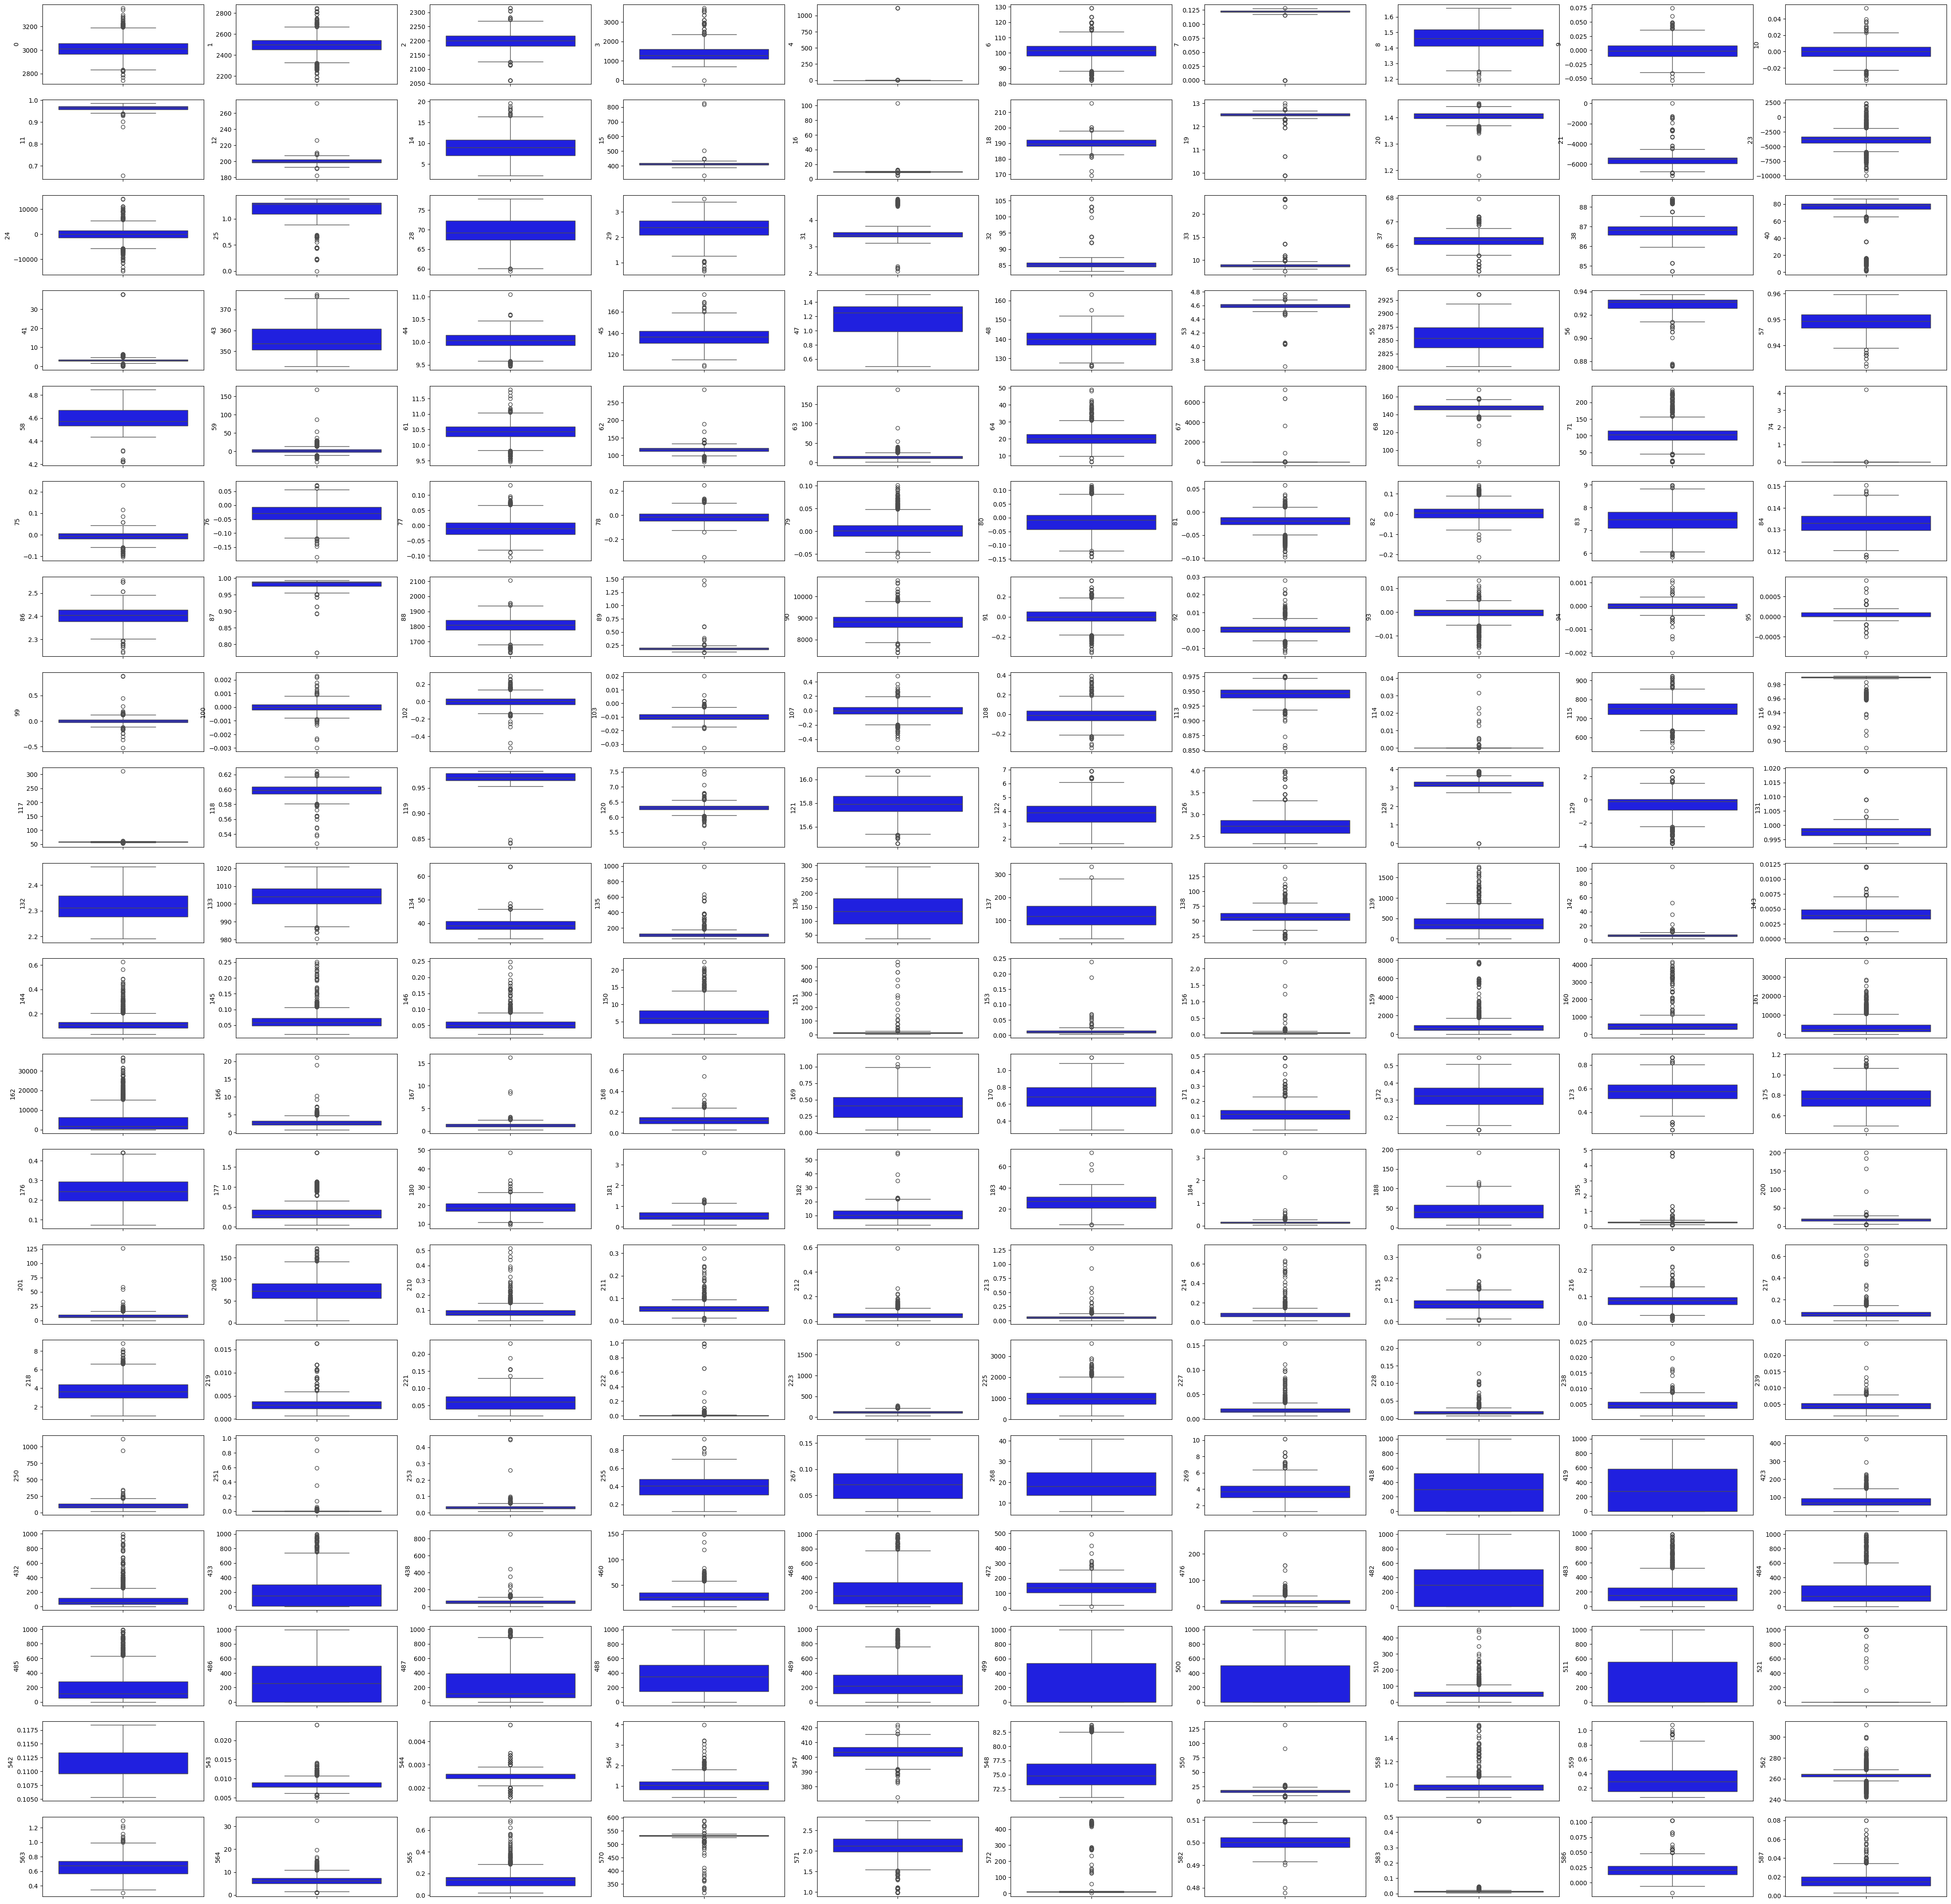

In [188]:
plt.figure(figsize=(55, 55))
col = 1
for i in data1.columns:
    plt.subplot(20,10, col)
    sns.boxplot(data1[i],color='blue')
    col += 1